# 기계 학습 개요
-----------

머신러닝은 (대용량) 데이터로부터 패턴을 찾아내는 알고리즘과 이를 성취하기 위해 활용되는 컴퓨팅 기술을 일컫는다.

컴퓨터가 데이터를 순차적으로 학습하면서 성능 (예측력)이 향상되는 과정을 거치기 때문에 머신러닝이라는 이름이 붙었다.

인공지능 분야에서 학습된 모형을 이용해 예측하거나 분류하는 역할을 수행하며, 인공지능의 방법론 중 주요한 축으로 활용되고 있다.

전통적 통계적 방법론의 연장선 상에서 통계적 기계학습 혹은 통계적 학습이라고도 하며, 두 용어를 구분해서 사용하기도 하고 혼용하여 사용하기도 한다.

전통적인 통계학에서 추론을 중요히 여겼다면, 머신러닝에서는 예측을 중요시한다.

#### 주요 참고자료

[An Introduction to Statistical Learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7)

[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

### 간단한 예제

다음 그림은 반응 변수인 Sales (제품 판매량)와 세 가지 입력 변수인 TV, Radio, Newspaper (각 매체에 배정된 광고 예산) 사이의 관계를 각각 따로 나타낸 선형 회귀선이다.

> 각 그림에서, 하나의 매체에 대한 광고비와 판매량 사이의 선형 관계를 시각화한 것이다.

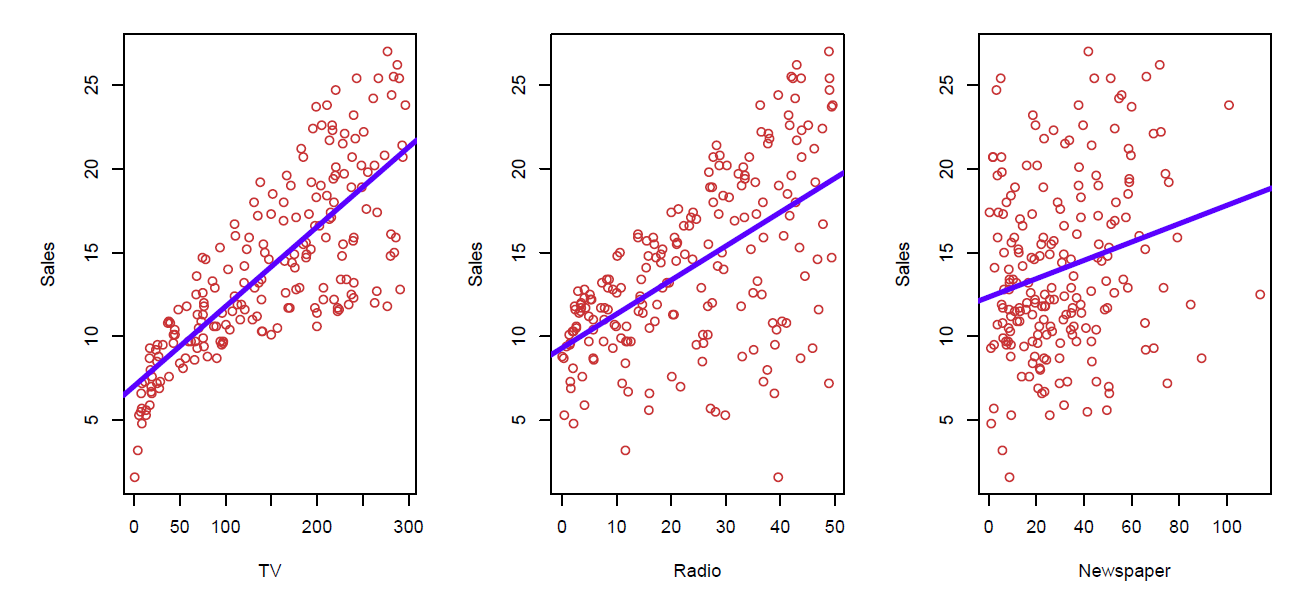

Sales에 대해 보다 정확한 예측을 위해서는 어떤 변수를 고려해야 할까?

TV? Radio? Newspaper? 아마 모두일 것이다.

위 그림을 보고 어떤 함수 $f$를 이용한 다음의 예측 모형을 생각해 볼 수 있다.

$$ \mathrm{Sales} \approx f(\mathrm{TV}, \mathrm{Radio}, \mathrm{Newspaper}) $$

### 표기법

여기서 Sales는 예측하고자 하는 반응 변수(response variable) 또는 타깃 변수(target) 이다. 

- 보통 $Y$로 표기한다.

TV, Radio, Newspaper는 예측에 사용되는 입력 변수(input) 혹은 설명 변수(predictors, features) 로서, 차례대로 $X_1, X_2, X_3$ 등으로 나타낼 수 있다.

이러한 입력 변수들을 하나의 벡터로 나타내면 다음과 같다.

$$ X = \begin{pmatrix} X_1 \\ X_2 \\ X_3 \end{pmatrix} $$

그리고 우리의 예측모형은 다음과 같이 쓸 수 있다.

$$ Y = f(X) + \epsilon $$

- $f(X)$는 입력 벡터 $X$로부터 예측된 값
- $\epsilon$은 예측할 수 없는 오차항 (인간이 이해할 수 없는 부분, 측정 에러, 오류 등)이다.

$f$가 예측을 잘 한다는 것은 어떤 의미인가?

> 이는 주어진 $X = x$ 값에 대해 계산된 예측값 $f(x)$를 실제 관찰된 반응변수 값 $Y$와 거의 일치한다는 것을 의미한다.

모형의 복잡도가 그리 높지 않다면 입력변수가 반응변수에 어떻게 영향을 미치는지 파악할 수 있다. 

### $f$는 어떻게 구하는가?

먼저, 간단히 $X$가 1차원인 경우를 고려해 보자.

주어진 $X$에 대한 $Y$의 분포가 아래의 산점도와 같다고 가정하자.

아래의 상황에서 $f(X)$의 이상적인 값은 얼마일까? 예를 들어, $X=4$일 때, $f(X)$의 적절한 값은 무엇일까?

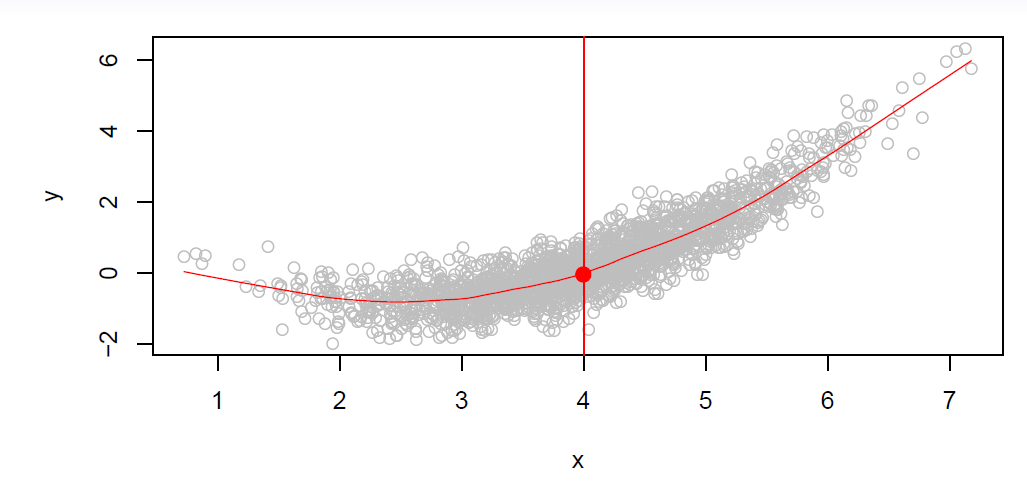

수학적으로 다음과 같이 표현할 수 있다.

$$ f(4) = \mathbb E [Y | X=4] $$

- 즉, $X=4$일 때 $Y$의 조건부 기댓값이다.

- $ f(x) = \mathbb E [Y | X=x] $를 regression 함수라고 부른다.

벡터 $X$에 대해서도 다음과 같이 확장할 수 있다.

$$ f(x) = f(x_1, x_2, x_3) = \mathbb E [Y | X_1 = x_1, X_2 = x_2, X_3 = x_3] $$

또한, $f$는 mean-squared prediction error 관점에서 ideal 혹은 optimal predictor라고 불리우는데, 모든 함수 $g$에 대해 

$$ f(x) = \arg \min_{g}\mathbb E[(Y - g(X))^2 | X = x]$$

이기 때문이다.

$ \epsilon = Y - f(x) $는 **irreducible 에러**라고 하며, 우리가 $f$의 참값을 알더라도, $Y$의 랜덤성 때문에 발생하는 어쩔 수 없는 에러이다.

또한, 실제 문제에서는 $f$의 참값을 정확히 알지 못하기 때문에 이것의 추정치인 $\hat f$를 이용해야 한다.

- 보통 데이터를 기반으로 $f$를 추정하여 $\hat f$라는 근사치를 만들게 된다.  
- 그리고 추정된 $\hat f$를 이용하여 주어진 $X = x$에 대한 예측을 수행.

#### Reducible error와 Irreducible error

$f$의 추정치인 $\hat f$에 대해, 실제 $Y$와 예측값인 $\hat{f} (X)$의 차이의 크기를 살펴보면,

$$
\mathbb{E}[(Y - \hat{f}(X))^2 \mid X = x] = \underbrace{\mathbb{E}[(f(x) - \hat f(x))^2]}_{\text{reducible error}} + \underbrace{\mathrm{Var}(\epsilon)}_{\text{irreducible error}}
$$

- **Reducible error**: 우리가 모델을 더 잘 만들수록 줄일 수 있는 오차

- **Irreducible error**: 노이즈나 우리가 관측하지 못한 요인들로 인해 발생하는 오차 (줄일 수 없다)

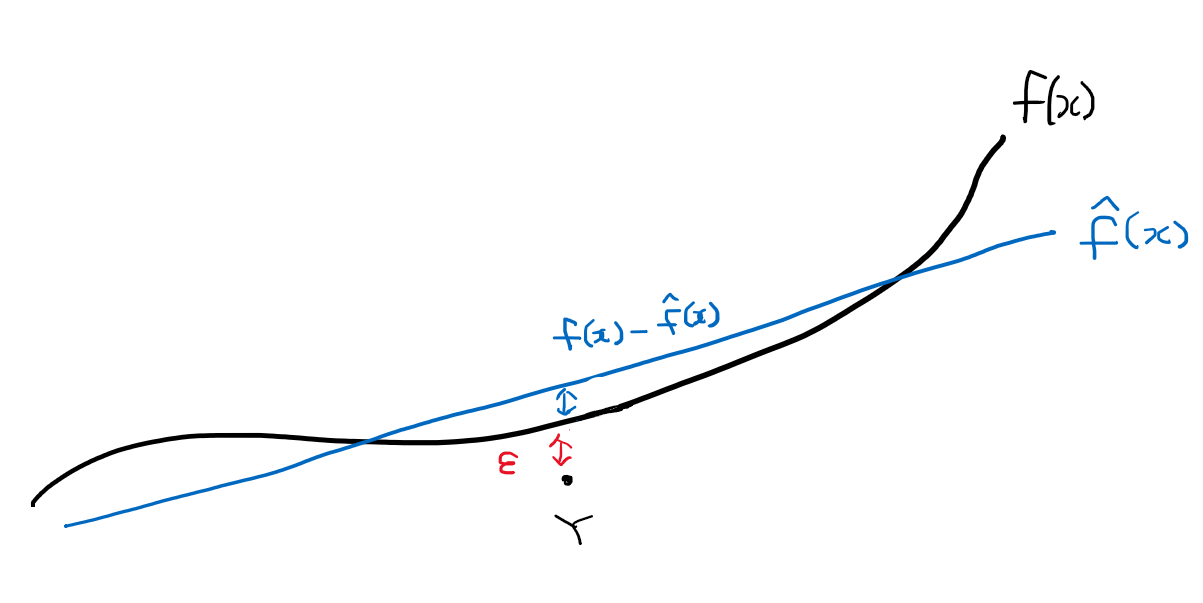

### $f$를 어떻게 추정해야 할까?

만약 $X$가 양적 변수라면, 일반적으로 정확히 $X=4$에 해당하는 데이터의 수는 매우 적거나 아예 없을 수도 있다.

따라서, 단순히 $X=x$인 데이터의 $Y$ 값들의 평균을 내는 방법으로는 $\mathbb E[Y | X=x]$를 정확하게 추정하기는 힘들다

보다 완화된 버전을 이용하여,

$$ \hat f(x) = \mathrm{Ave} ( Y | X \in \mathcal N (x)) $$

를 이용할 수 있다. 여기서 $\mathcal N (x)$는 $x$의 적절한 neighborhood를 의미하며, 일종의 local average라고 볼 수 있다.

즉, $X$가 $x$ 근방인 데이터들의 $Y$ 값들의 평균을 취하여 $\hat f(x)$를 추정하는 방법이다.

입력 변수의 수 $p$가 적고 총 데이터의 수 $N$이 충분히 크다면 위 neighborhood 방법은 잘 적용된다.

### 차원의 저주

하지만 $p$가 크다면 위 방법을 쉽게 적용할 수 없다. 이를 차원의 저주 (curse of dimensionality)라고 부른다.

$\mathrm{Ave} ( Y | X \in \mathcal N (x))$를 계산하기 위해, 예를 들어, 전체 데이터의 10%가 필요하다고 하자.

만약, 차원이 적다면 큰 문제는 없겠지만, 차원이 커지면 10% neighborhood는 더 이상 local이 아니게 된다.

즉, local averaging을 통해 $\mathbb E [Y | X=x]$를 계산하고자 했던 취지를 만족하지 못한다.

따라서, 단순 local averaging이 아닌, 앞으로 공부할 다양한 통계적 학습 기법을 이용해야 할 것이다.

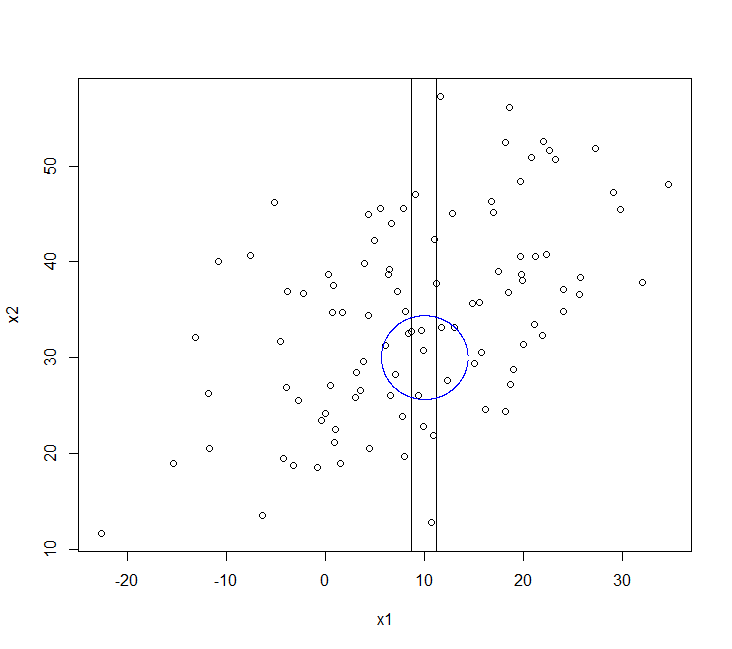

### Overfitting and underfitting in a parametric model

위에서 설명한 local average 방법은 모든 가능한 $X$의 값에 대해 조건부 기댓값을 근사해야 한다. 

- $X$가 실수값 위에서 정의될 경우, 무한히 많은 $X$의 값에 대해 계산이 필요하다.  
  
- 이러한 계산의 복잡성과 차원의 저주를 극복하기 위해 기계학습에서 parametric model들이 도입된다.

Parametric model은 데이터가 특정한 형태 (form)를 가진 함수로부터 생성된다고 가정하고, 그 함수의 모수 (parameter)만을 추정하는 모델

- 모델의 구조 (form)를 사전에 결정하고

- 데이터로부터 파라미터의 값만 학습하여 전체 함수를 결정하는 방식
  
- 구조를 가정하고 유한한 파라미터 수만을 추정함으로써, 고차원 $X$에 대해서도 안정적 작동할 수 있으며, 이에 차원의 저주 문제를 해결할 수 있음
  
선형 모형은 parameteric model의 대표적인 예이다.

$$ f_L (X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p $$

간단한 선형 모형은 비록 완벽히 맞는 일은 거의 없지만, $f$라는 true function에 대한 해석 가능한 근사치로 중요하게 사용된다.

선형 모형은 이차 모형 등으로 확장할 수 있다.

$$ f_Q (X) = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 $$

Income이라는 반응변수에 대한 다음의 적합된 모형들을 고려해 보자.

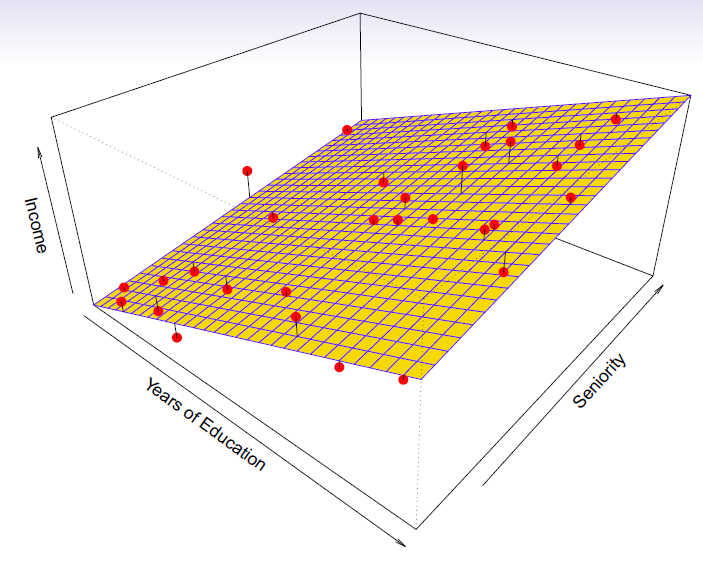

위 그림은 빨간 점들은 시뮬레이션으로 생성된 가상의 값이다.

이 값들에 선형모형을 적합하였다.

$$ \hat f_L (\mathrm{education}, \mathrm{seniority}) = \hat \beta_0 + \hat \beta_1 \times \mathrm{education} + \hat \beta_2 \times \mathrm{seniority} $$

빨간 점들과 평면 사이의 거리가 오차를 나타낸다.

데이터에 비해 모형이 단순하다면, 이를 **underfitting (과소적합)** 이라고 한다.

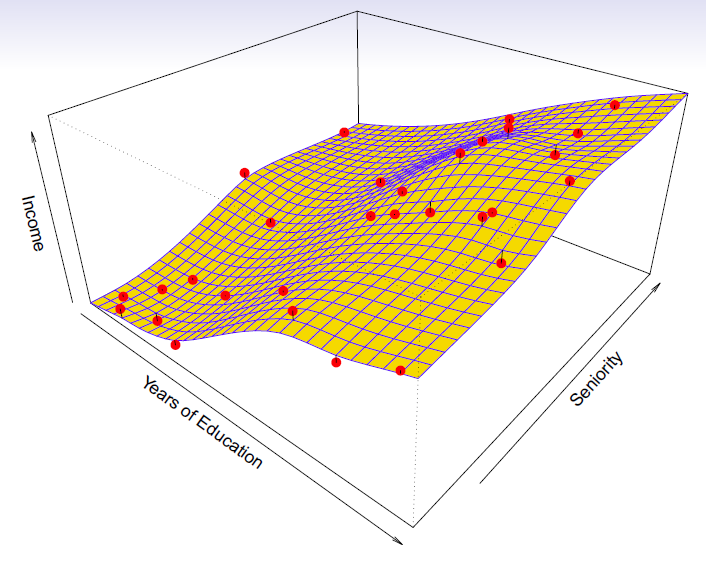

위 그림에서는 같은 데이터에 대해, thin-plate spline이라는 보다 flexible한 방법을 적용하였다.

앞의 선형모형과 비교하였을 때, 오차의 크기들이 줄어든 것을 볼 수 있다.

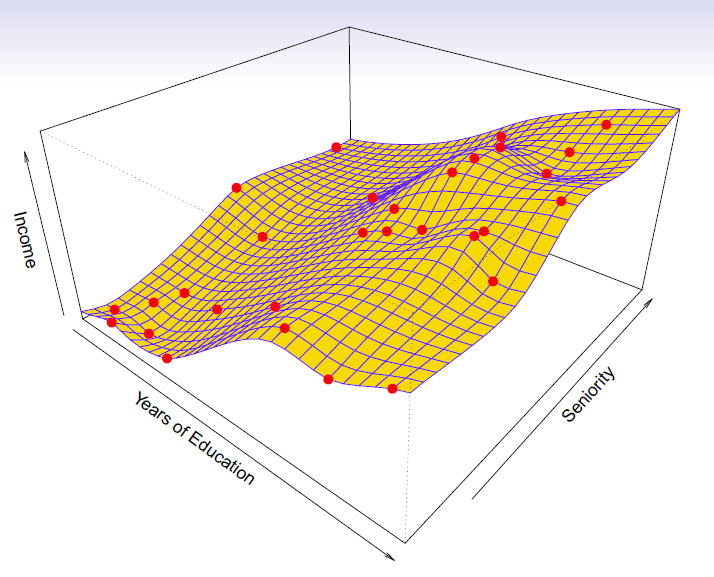

마지막으로 위 그림에서는 보다 더 flexible한 spline regression을 적용하였다. 

여기서는 적합된 모형이 아무런 오차를 발생하지 않는다.

하지만, 중요한 점은 오차가 없다고 해서 이 모형이 좋은 모형이라는 것이 아니다.

적합에 사용한 데이터가 아닌 새로운 데이터를 이용하여 테스트하면 아마도 큰 오차가 발생할 것이다.

이를 **overfitting (과적합)** 되어 있다고 말한다.

### Trade-off

예측 정확성 vs 해석 능력 (interpretability)

* 선형 모형은 해석 능력이 좋지만, thin-plate spline은 해석 능력이 떨어진다.

* 반면, thin-plate spline이 더 좋은 예측 정확성을 지닌다.

Good fit vs over-fit or under-fit

* 적절한 적합은 overfitting과 underfitting 사이에 위치한다. 그러면 정확히 어디쯤이 될 것인가?

* 위 예제에서 선형모형은 underfitting, 세번째 모형은 overfitting이다.

Parsimony vs black-box

* 모형 간결성이 대체로 좋으나 보다 높은 예측 성능을 위해 black-box predictor를 선택할 수도 있다.

### 행렬 표현법


일반적으로 $x_{ij}$를 $j$번째 입력변수의 $i$번째 관찰값으로 정의한다. 여기서 $i=1,2,\cdots,N$이고 $j=1,\cdots,p$이다.


그러면 $x_{ij}$로 이루어진 $N \times p$ 행렬 $\mathbf{X}$를 생각할 수 있다.

$$ 
\mathbf{X} = \begin{bmatrix} 
    x_{11} & x_{12} & \cdots & x_{1p}\\
    x_{21} & x_{22} & \cdots & x_{2p}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N1} & x_{N2} & \cdots & x_{Np}  
    \end{bmatrix}
$$

$i$번째 관찰값들인 행들은 $x_i$로 표현한다. 즉, $x_i$는 총 $p$개의 값을 지니며,

$$ x_i = \begin{bmatrix} x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}\end{bmatrix} $$

이다.

$j$번째 입력변수의 모든 관찰값은 $\mathbf{x}_j$로 표현한다. 즉, $\mathbf{x}_j$는 총 $N$개의 값을 지니며,

$$ \mathbf{x}_j = \begin{bmatrix} x_{1j} \\ x_{2j} \\ \vdots \\ x_{Nj} \end{bmatrix}$$

이다.

또한 반응변수들의 관찰값 또한 벡터로서 표현된다.

$$ \mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} $$